# Regression project - Karl Merisalu

<b>Problem:</b> in this project I'm going to use a dataset from Kaggle to build a regression model to determine which wines are likely to be rated higher on a 100pt scale based on their characteristics like price and country of origin

This is an interesting problem to tackle, because we would usually expect more expensive wines to be rated higher than cheaper wines. In this analysis we also check if other factors like country of origin has any impact on wine rating

For this analysis I use data from Kaggle.com containing 150k different wines with their characteristics and ratings

### 1) Importing libraries
First we import required libraries which will help us to do data manipulation and run regression analysis algorithms later on

In [309]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
# Suppressing depreciation warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2) Importing the dataset
In order to replicate this analysis the data used can be downloaded from: https://www.kaggle.com/zynicide/wine-reviews/data#.
We also take an initial look at the dataset after importing

In [310]:
# importing dataset
dataset = pd.read_csv('winemag-data_first150k.csv')

# making sure dataset is a dataframe
dataset = pd.DataFrame(dataset)

# looking at the header of the dataset
dataset.head()

Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

<b>Comment:</b> as you can see from above, the dataset contains several variables about 150k wines. At this point we are only interested in points (rating), price and country of origin, so we will drop other unnecessary columns. What we have left is portrayed below:

In [311]:
# Dropping unnecessary columns
dataset = dataset.drop(columns=["Unnamed: 0", 'description', 'designation', 'region_1', 'region_2', 'winery', 'province', 'variety'])
dataset.head()

country  points  price
0      US      96  235.0
1   Spain      96  110.0
2      US      96   90.0
3      US      96   65.0
4  France      95   66.0

### 3) Data exploration
Let's take an initial look at the dataset to see if we have any missing valuables.

In [312]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 3 columns):
country    150925 non-null object
points     150930 non-null int64
price      137235 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ MB


<b>Comment:</b> we can see from above that we have far fewer datapoints on price compared to points for example. This suggests that we have some missing values in the dataset. Next, let's take a closer look at the value distribution of the dataset

In [313]:
dataset.describe()

points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000

<b>Comment:</b> we can see that all wine ratings are between 80-100 points and that the range of prices is from 4-2300 (currency)

### 4) Cleaning the dataset
As we identified previously, we have missing values in the dataset. Let's get rid of them:

In [314]:
dataset = dataset.dropna()
dataset.describe()

points          price
count  137230.000000  137230.000000
mean       87.788035      33.132019
std         3.221572      36.323072
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000

<b>Comment:</b> Looks like the counts for points and price now match

### 5) Points considerations
We can see from above a rough slicing of values by quarters. However, to get a mode detailed view how points are distributed we should plot values to a histogram as comes up next:

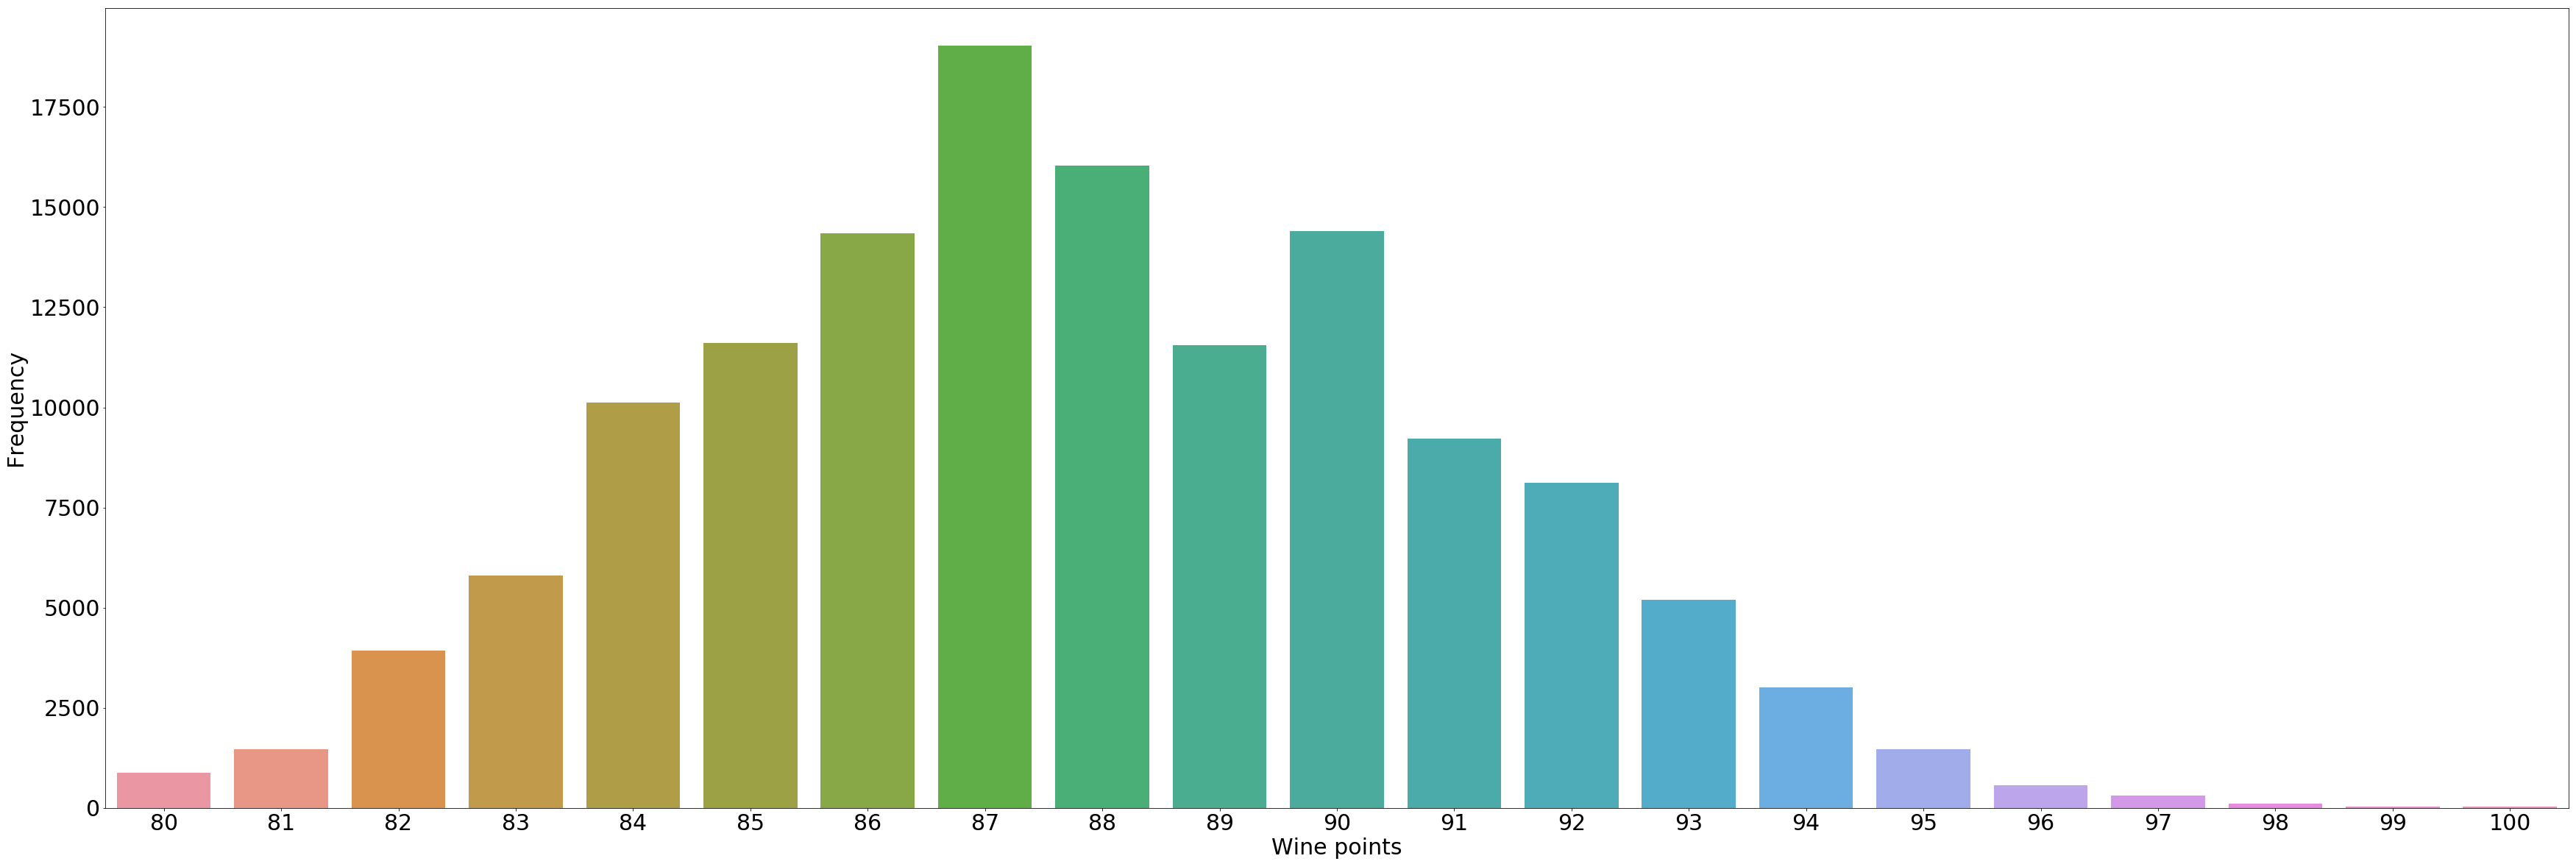

In [315]:
# going to see the histogram for points

chart1 = sns.countplot(x='points', data=dataset)
chart1.figure.set_size_inches(60,20)
chart1.set_xlabel("Wine points", fontsize=30)
chart1.set_ylabel("Frequency", fontsize=30)
chart1.tick_params(labelsize = 30)

### 6) Data preparation for regression analysis
<b>Getting dummy variables for countries</b>: we need to convert our categorical country name variables to dummy variables in order to make them machine understandable (dummy variables are variables that equal 1 when the condition is present and equal 0 when the condition is not present). We don't need to adjust price data because it is understanable the same way for each wine. 

After getting dummy variables we display the new dataset below

In [316]:
# creating a new dataset with dummy variables
dum_dataset = pd.get_dummies(dataset)
dum_dataset.head()

points  price  country_Albania  country_Argentina  country_Australia  \
0      96  235.0                0                  0                  0   
1      96  110.0                0                  0                  0   
2      96   90.0                0                  0                  0   
3      96   65.0                0                  0                  0   
4      95   66.0                0                  0                  0   

   country_Austria  country_Bosnia and Herzegovina  country_Brazil  \
0                0                               0               0   
1                0                               0               0   
2                0                               0               0   
3                0                               0               0   
4                0                               0               0   

   country_Bulgaria  country_Canada       ...         country_Slovenia  \
0                 0               0       ...                        0   
1                 0               0       ...                        0   
2                 0               0       ...                        0   
3                 0               0       ...                        0   
4                 0               0       ...                        0   

   country_South Africa  country_South Korea  country_Spain  \
0                     0                    0              0   
1                     0                    0              1   
2                     0                    0              0   
3                     0                    0              0   
4                     0                    0              0   

   country_Switzerland  country_Turkey  country_US  country_US-France  \
0                    0               0           1                  0   
1                    0               0           0                  0   
2                    0               0           1                  0   
3                    0               0           1                  0   
4                    0               0           0                  0   

   country_Ukraine  country_Uruguay  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 48 columns]

<b>Comment:</b> in order to pre-empt problems with further analysis, we will quickly remove spaces from South Africa and New Zealand columns

In [317]:
dum_dataset.rename(columns={'country_South Africa':'country_South_Africa', 'country_New Zealand':'country_New_Zealand'}, inplace=True)

<b>Correlation analysis:</b> initial analysis to get a quick overview of correlation between all variables in the dataset

In [318]:
# as the dataset is huge, calculating correlation matrix first
cor_matrix = dum_dataset.corr()

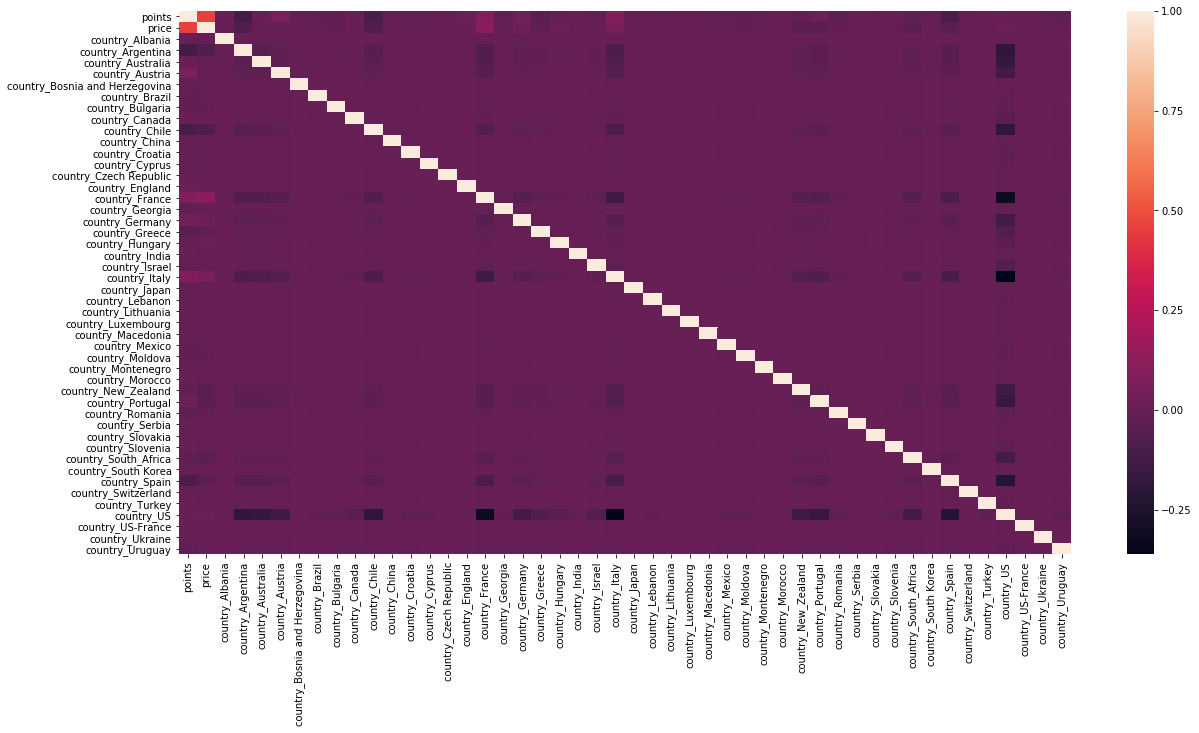

In [319]:
# plotting the matrix separately
plt.figure(figsize=(20, 10))
sns.heatmap(cor_matrix)

<b>Comment:</b> as expected we see correlation between price and points. There doesn't seem to be too strong correlation between other variables based on the above though!

### 7) Multivariate linear regression
Let's get started with the regression analysis below. First we check that we have a complete dataset and that data types are as we expect them to be

In [320]:
dum_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137230 entries, 0 to 150929
Data columns (total 48 columns):
points                            137230 non-null int64
price                             137230 non-null float64
country_Albania                   137230 non-null uint8
country_Argentina                 137230 non-null uint8
country_Australia                 137230 non-null uint8
country_Austria                   137230 non-null uint8
country_Bosnia and Herzegovina    137230 non-null uint8
country_Brazil                    137230 non-null uint8
country_Bulgaria                  137230 non-null uint8
country_Canada                    137230 non-null uint8
country_Chile                     137230 non-null uint8
country_China                     137230 non-null uint8
country_Croatia                   137230 non-null uint8
country_Cyprus                    137230 non-null uint8
country_Czech Republic            137230 non-null uint8
country_England                   137230 non-nu

<b>Next,</b> we take a quick look at the histogram on how many wines are represented by each country

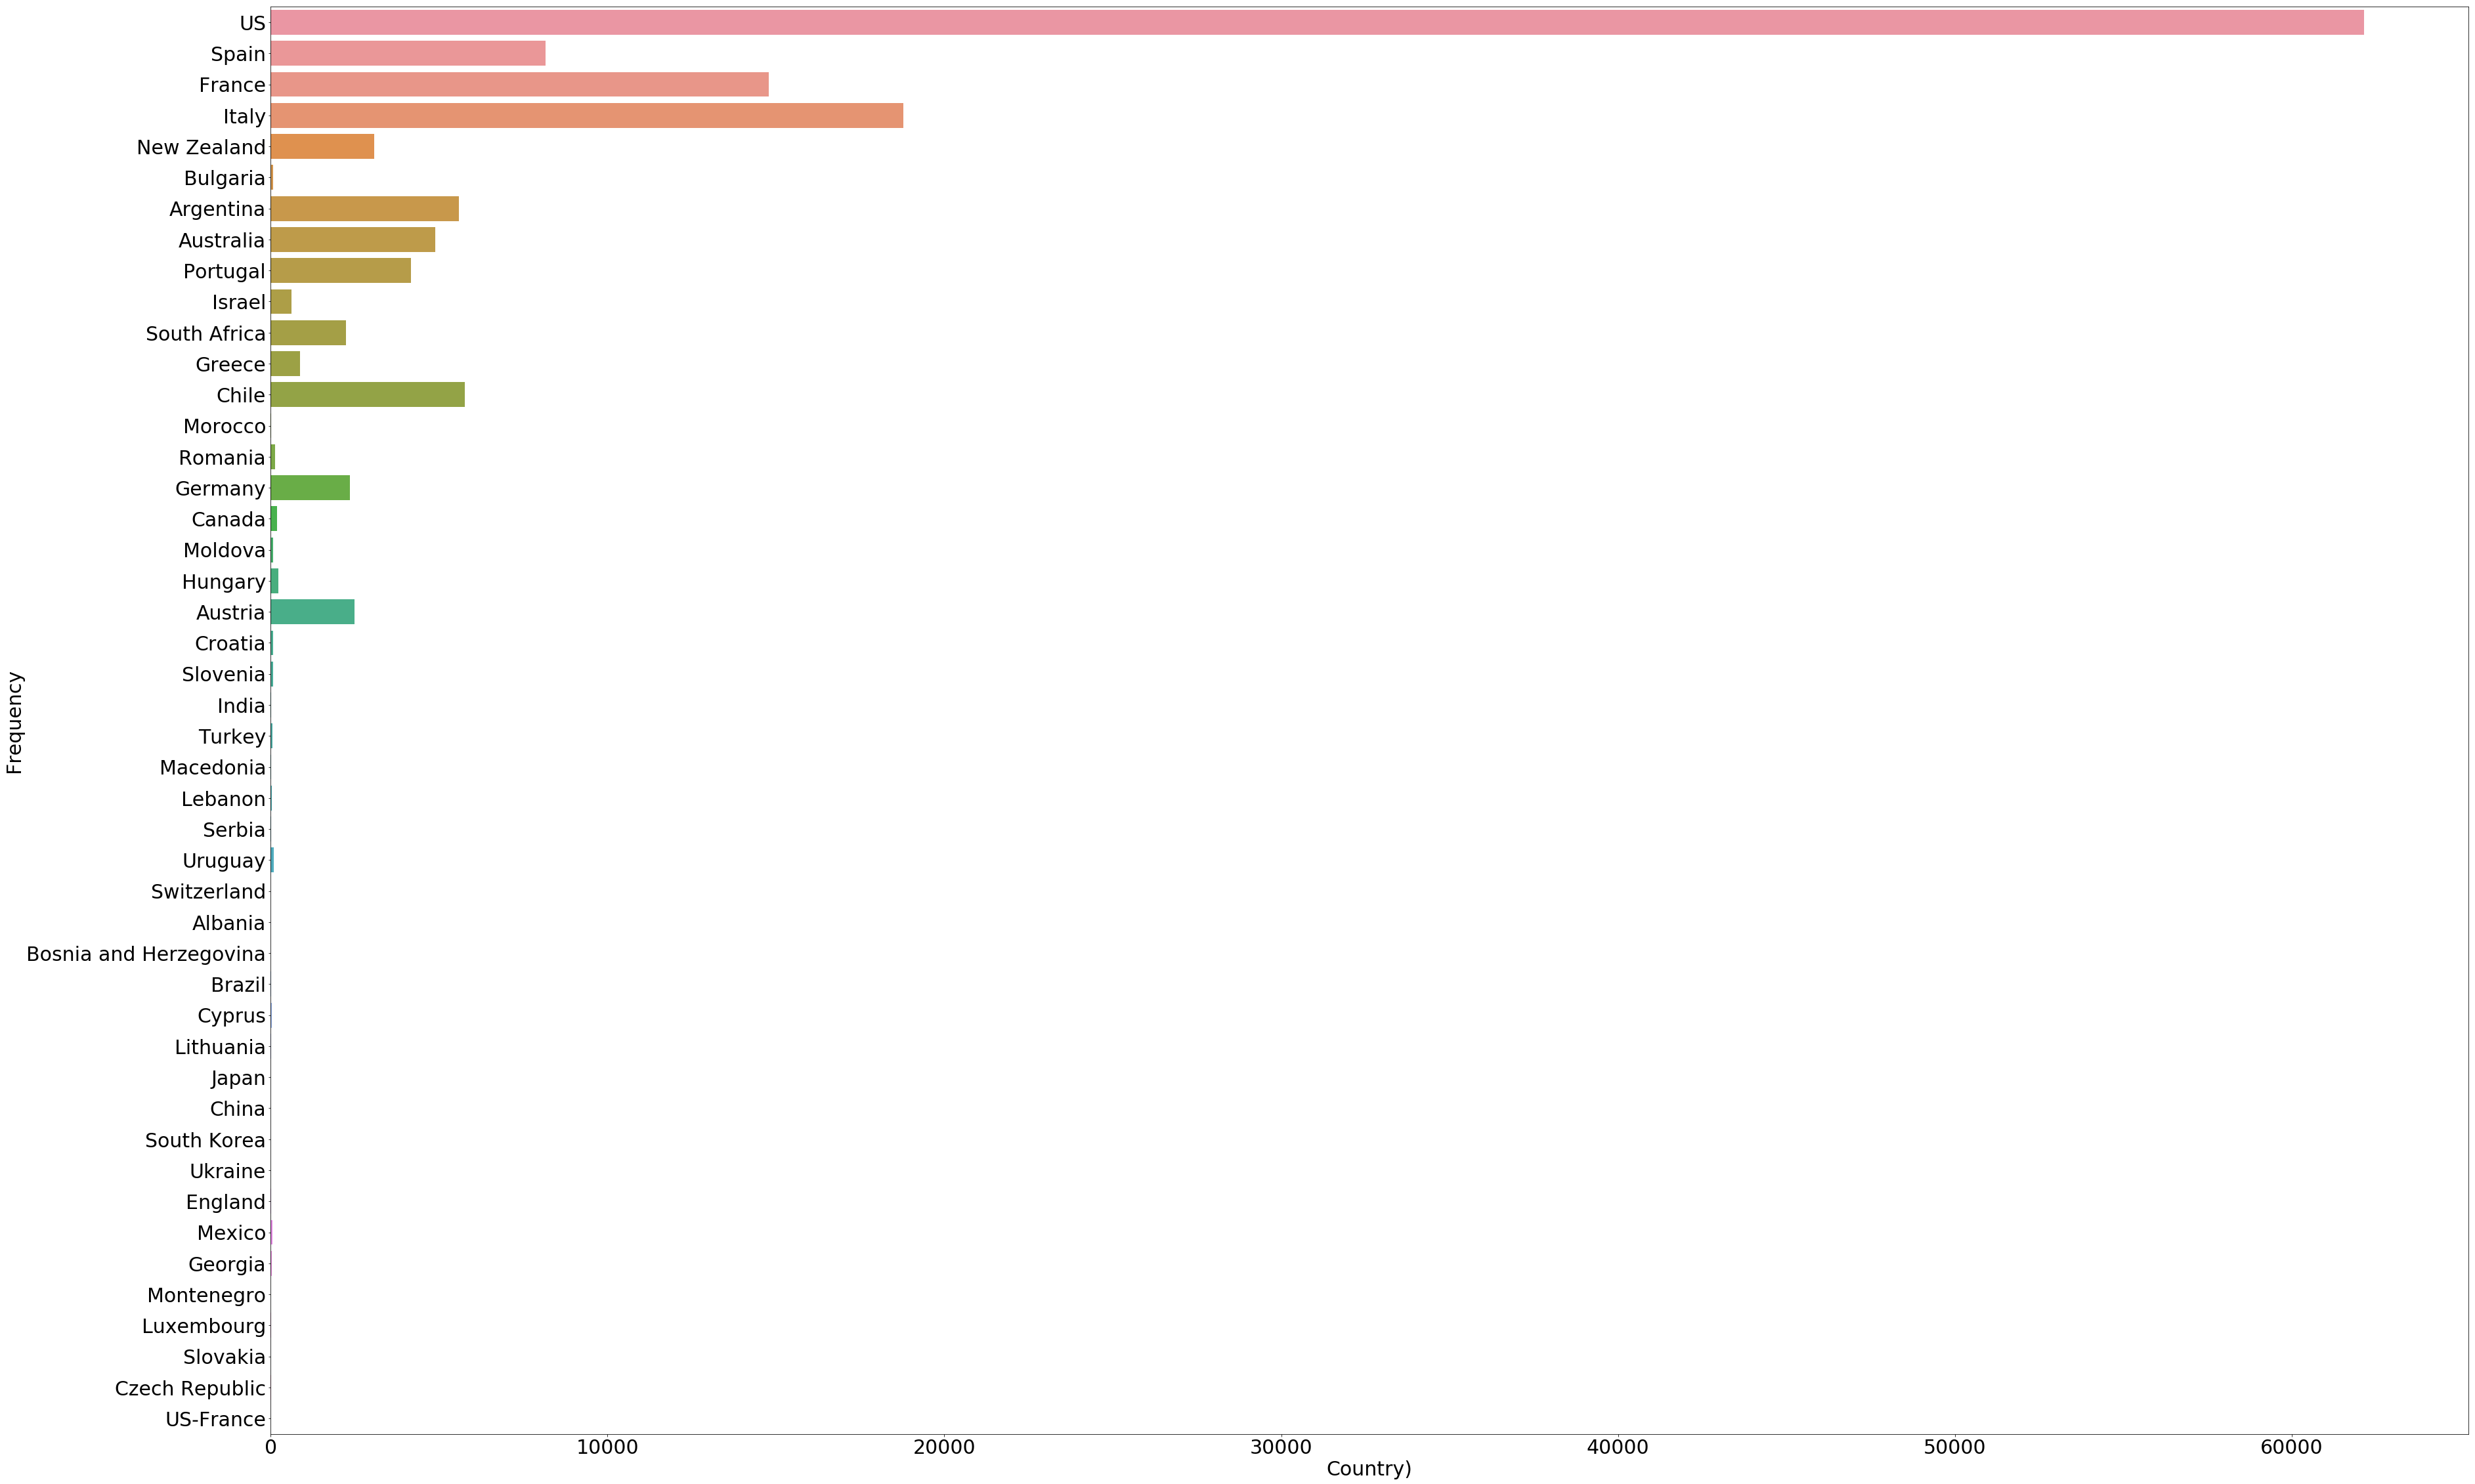

In [321]:
chart2 = sns.countplot(y='country', data=dataset)
chart2.figure.set_size_inches(60,40)
chart2.set_xlabel("Country)", fontsize=30)
chart2.set_ylabel("Frequency", fontsize=30)
chart2.tick_params(labelsize = 30)
plt.show()

<b>Defining regression variables:</b> Now I define which variables we want to take into account in our regression model. Based on the histogram above, I will focus on variables which have a reasonably significant representation in the dataset (top 14 countries). 

<b>Country + price variables</b> will be defined as 'X' (independent) variables of the model.

<b>Points</b> will be our 'y' (dependent) variable that we will predict by using X variables

After defining y and X variables we randomise our dataset and then split it to train & test portions (75% / 25% respectively)

In [322]:
# creating subsets for multivariate model

X = dum_dataset[['price', 
'country_Argentina', 
'country_Australia',               
'country_Israel',                                    
'country_Chile',                                            
'country_France',                  
'country_Austria',                
'country_Germany',               
'country_Greece',                               
'country_Italy',                               
'country_New_Zealand',           
'country_Portugal',                             
'country_South_Africa',                      
'country_Spain',                                     
'country_US']]
y = dum_dataset[['points']]
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

Quick look below at the dimensions of the train/test datasets to test splitting results will reveal we have successfully split the data

In [323]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(102922, 15) (102922, 1)
(34308, 15) (34308, 1)


<b>Creating the linear regression model</b> below and training it with our training dataset

In [324]:
# Creating linear regression object
regression_model = linear_model.LinearRegression()

# Training the model using the training sets
regression_model = regression_model.fit(X_train, y_train)

<b>Initial model results:</b>After having created and trained the model, let's take a quick look at how well does the model explain y results by usin X variables. This metric is called R-squared:

In [325]:
# The R-squared
print('The R-squared is:', regression_model.score(X_train, y_train))

The R-squared is: 0.23513538247606047


R-squared of 23.5% can be considered very low, and is not sufficient for a well fitted model. This means that our model is able to explain 23.5% of the wine rating.

Given that we're predicting wine rating only based on price and country of origin, this is to be expected. Somewhat surprising perhaps is that price doesn't explaine wine rating more than that...

Next, let's take a quick look at coefficients and the intercept of our regression model

In [326]:
# The coefficients
print('Coefficients: \n', regression_model.coef_)

Coefficients: 
 [[ 0.03806981 -0.14948451  1.37488429  0.70104543  0.23897734  1.52860209
   2.68100791  1.79599981 -0.064646    1.68478557  1.2666642   1.81243892
   1.06109565  0.28040295  1.20173291]]


In [327]:
# The intercept
print('Intercept: \n', regression_model.intercept_)

Intercept: 
 [85.33156537]


<b>Plotting results:</b> first let's get predicted y results from our model by using the x_test dataset and then plot them on the chart along with the y_test (real results) to compare accuracy. 

In [328]:
y_pred = regression_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

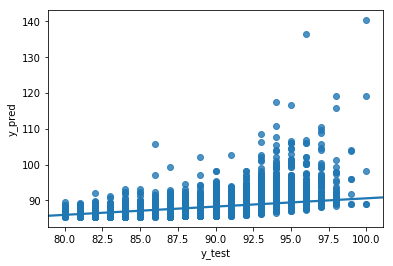

In [329]:
y_test = y_test['points'].reset_index()
y_obs_pred = pd.concat([y_test['points'], y_pred], axis=1)
y_obs_pred.columns = ['y_test', 'y_pred']
y_obs_pred['diff']= y_obs_pred['y_test'] - y_obs_pred['y_pred']
r = sns.regplot(x='y_test', y = 'y_pred', data=y_obs_pred)

<b>Comment:</b> for an accuracte model y_test ~ y_pred above, but we already know that we are able to explain only 23.5% of the results.

### 7.1) Multivariate regression model in STATSMODEL
Running the same model by using statsmodel libraries. 

In [330]:
# Running the same regression in statsmodel

Train = pd.concat([X_train, y_train], axis=1)
Formula = 'points ~ price + country_Argentina + country_Australia + country_Israel + country_Chile + country_France + country_Austria + country_Germany + country_Greece + country_Italy + country_New_Zealand + country_Portugal + country_South_Africa + country_Spain + country_US'
regression_model = smf.ols(Formula, data = Train).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     2109.
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:16:19   Log-Likelihood:            -2.5271e+05
No. Observations:              102922   AIC:                         5.054e+05
Df Residuals:                  102906   BIC:                         5.056e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               85.3316 

<b>Comment:</b> we can see that Greece, Chile and Argentina have high p-values above (meaning their significance is lower), so we will remove these variables and train the model again to see if it improves the results

In [331]:
# Removing country Greece, Chile and Argentina due to high p-values

Train = pd.concat([X_train, y_train], axis=1)
Formula = 'points ~ price + country_Australia + country_Israel + country_France + country_Austria + country_Germany + country_Italy + country_New_Zealand + country_Portugal + country_South_Africa + country_Spain + country_US'
regression_model = smf.ols(Formula, data = Train).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     2632.
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:16:20   Log-Likelihood:            -2.5273e+05
No. Observations:              102922   AIC:                         5.055e+05
Df Residuals:                  102909   BIC:                         5.056e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               85.3687 

<b>Comment:</b> after removing 3 countries, the results have barely changed (R-squared still 23.5%). Finally, we use this (new) model to make predictions and we plot the results similarly to what we did previously against real values

In [332]:
y_pred = regression_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)

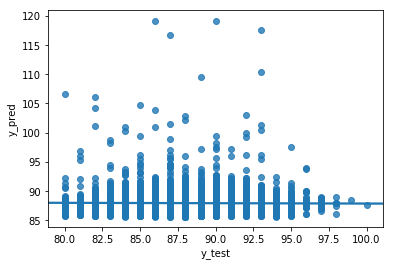

In [333]:
# comparing model prediction to actual numbers in a scatterplot

y_test = y_test['points'].reset_index()
y_obs_pred = pd.concat([y_test['points'], y_pred], axis=1)
y_obs_pred.columns = ['y_test', 'y_pred']
y_obs_pred['diff']= y_obs_pred['y_test'] - y_obs_pred['y_pred']
r = sns.regplot(x='y_test', y = 'y_pred', data=y_obs_pred)

### 8) Summary Conclusion:

1) Given available data I have built a model analysing wine price and its country of origin's effect on wine rating (points). The model explains 23.5% (R^2) of wine rating results. 

2) From the results it can be concluded that there is a positive correlation between the rating of the wine (points) and the price of the wine. On average, +1USD in wine price adds 0.0381 points to the wine rating.

3) Given available data, we could also model the effect of wine origin country to wine rating. Everything else constant, wines originating from Austria add the most points (2.6443) to wine rating and wines originating from Spain add the least points (0.2436) to wine rating.

4) This means that pricey Austrian wines have the highest likelyhood of being highly rated and cheap Spanish wines have the highest likelyhood of having low ratings.

5) This analysis is meant to show the process of regression analysis. It is limited by available data and could be definitely improved in accuracy by including additional data on the specifics of wine eg. acidity, sugar amount, etc. 